<a href="https://colab.research.google.com/github/guimaraaes/data-science/blob/master/pycaret-titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore') 

#DESCRIÇÃO DA PROBLEMÁTICA
Esse notebook consiste em descrever os dados do naufrágio do Titanic e com Machine Learning (ML) predizer se os passageiros no DataFrame de teste vão sobreviver ou não. No database do Kaggle temos,

> Preveja a sobrevivência no Titanic e familiarize-se com os fundamentos do ML

As variáveis do banco de dados analisado no arquivo *train.csv* e *test.csv* são:
*   **survival**: sobrevivência; 
*   **pclass**: tipo de classe de embarque; 
*   **sex**: sexo; 
*   **Age**: idade; 
*   **sibsp**: número de irmão ou conjuguês a bordo; 
*   **parch**: número de parentes/crianças a bordo; 
*   **ticket**: número do tiket; 
*   **fare**: taxa paga pelo passgeiro; 
*   **cabin**: cabine; 
*   **embarked**: porto de embarque.

#OBTENÇÃO DOS DADOS
Nessa etapa é descrito duas formas de obter os dados. Deve ser escolhida apenas uma e atentar para quais linhas podem ser executadas sempre ou não.


##Kaggle e Google Drive
> Para realizar esse método é necessário ter uma conta no Kaggle e ter configurado o seu Google Drive para executar o download.


No código a seguir são realizadas as seguintes ações:
1.   conexão com o google drive;

2.   download dos dados obtidos no [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview) para o drive (apenas na primeira vez);

3.   atribuição destes dados à variável *data_train* e *data_test* com o biblioteca pandas.

In [ ]:
# 1
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle/titanic-machine_learning_from_disaster/

# 2
#descomentar apenas para o primeiro download
# !kaggle competitions download -c titanic
# !unzip \*.zip  && rm *.zip

# # 3
data_train=pd.read_csv('/content/gdrive/My Drive/Kaggle/titanic-machine_learning_from_disaster/train.csv')
data_test=pd.read_csv('/content/gdrive/My Drive/Kaggle/titanic-machine_learning_from_disaster/test.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Kaggle/titanic-machine_learning_from_disaster


## GitHub

Além disso, também disponibilizei uma cópia dos dados do Kaggle no meu GitHub.

In [ ]:
# data_train=pd.read_csv('/content/gdrive/My Drive/Kaggle/spotify-data-with-audio-features/train.csv')
# data_test=pd.read_csv('/content/gdrive/My Drive/Kaggle/spotify-data-with-audio-features/test.csv')

# TRATAMENTO DOS DADOS

Nessa etapa são realizadas diversas análises para conseguir identificar quais modificações podem ser realizadas nos dados para conseguir manipular eles e adquirir *insights*. Primeiro observamos que ambos os Dataframes são compostos de 12 variáveis e 891 dados para o de train e o no test temos 11 variáveis e 9239 dados. A diferença de uma variável é devido aos dados de treino informarem se o passageiro sobreviveu ou não, após o processamento dos dados de teste na ML vamos definir se os passageiros sobreviveram ou não.

In [ ]:
print('Dimensão do DataFrame data_train')
print("variáveis: ", data_train.shape[1])
print("dados:     ", data_train.shape[0])

print('Dimensão do DataFrame data_test')
print("variáveis: ", data_test.shape[1])
print("dados:     ", data_test.shape[0])

Dimensão do DataFrame data_train
variáveis:  12
dados:      891
Dimensão do DataFrame data_test
variáveis:  11
dados:      418


A seguir vamos separa na variável survived os dados os passageiros que sobreviveiram no DataFrame de teste,

In [ ]:
survived = data_train.Survived
data_train.drop('Survived', axis='columns', inplace=True)

Agora com os dois DataFrames com a mesma quantidade de variável vamos concatenar os dois para processar os dados,

In [ ]:
train_lines = data_train.shape[0]
data = pd.concat([data_train, data_test])

print('Dimensão do DataFrame data')
print("variáveis: ", data.shape[1])
print("dados:     ", data.shape[0])

Dimensão do DataFrame data
variáveis:  11
dados:      1309


De início vemos que a variável Cabin possui a maior porcentagem de dados nulos, logo, essa variável será excluída do DataFrame. Já as outras variável como Age, Fare e Embarked, vamos realizar manipulações futuras para poder substituir esses valores.





In [ ]:
data.isnull().mean()*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

De variáveis categóricas temos que Pclass, Sex, SibSp, Parck e Embarked.

In [ ]:
data.nunique()

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

Já analisando o tipo dos dados vamos realizar apenas manipulações básicas para converter dados do tipo object para string.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


Para preenchermos os valores nulos das variáveis de idade vamos iniciar selecionando o pronome de tratamento dos passageiros e plotanto o boxplot da variável idade para esse pronome de tratamento,

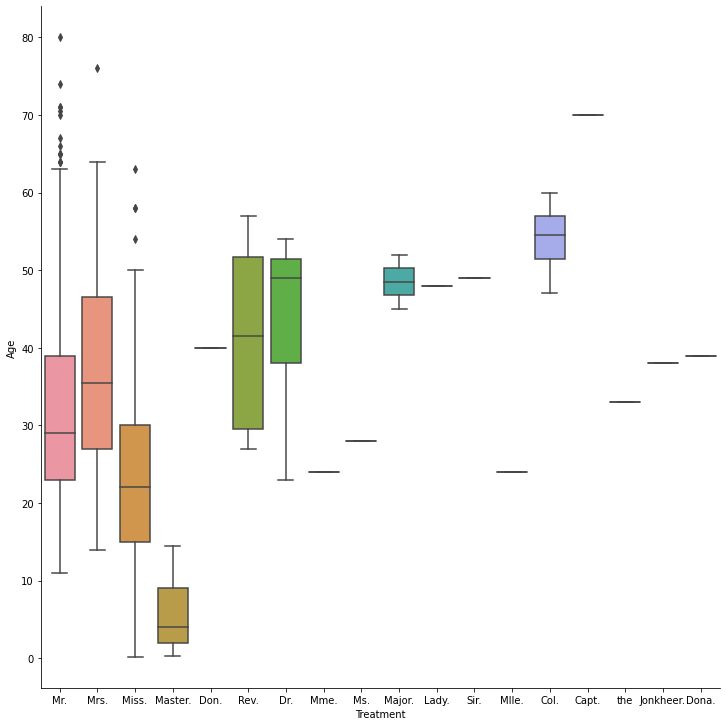

In [ ]:
treatment = []
for my_string in data['Name']:
  res = my_string.split(',', maxsplit=1)[-1]\
                .split(maxsplit=1)[0]
  treatment.append(res)
data['Treatment'] = treatment
# data.head(20)
count_treatment = data[['Name', 'Treatment']].groupby('Treatment').count()
age_treatment = data[['Age', 'Treatment']].groupby('Treatment').median()

pd.concat([count_treatment, age_treatment], axis='columns')
sns.catplot(kind='box', y='Age', x='Treatment', data=data, height=10, aspect=1)

Para diminuir algumas variáveis de tratamento vamos realizar o seguinte agrupamento em uma nova coluna no DataFrame de modo o obter o novo gráfico de boxplot

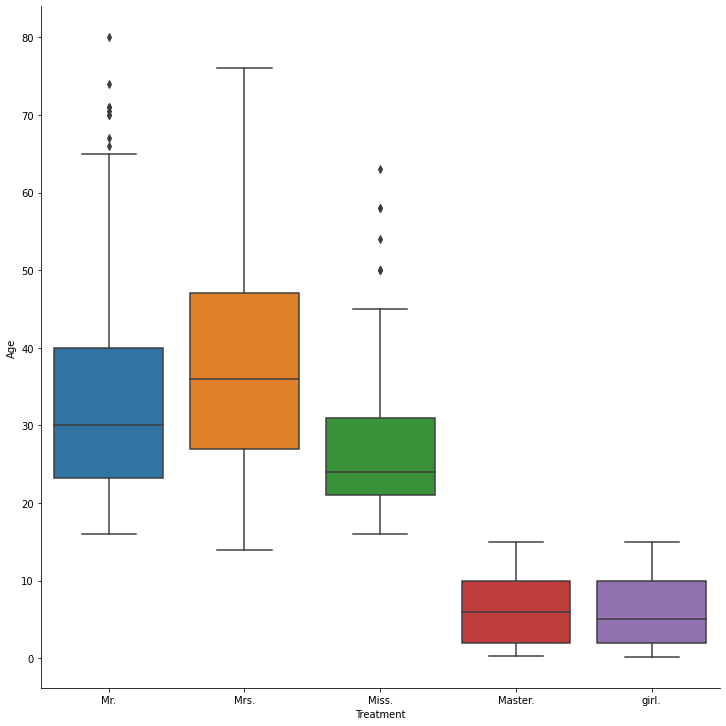

In [ ]:
data.loc[(data['Treatment'] == "Capt.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Don.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Col.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Dona.") , "Treatment"] = "Mrs."
data.loc[(data['Treatment'] == "Dr.") & (data['Sex'] == "male"), "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Dr.") & (data['Sex'] == "female"), "Treatment"] = "Mrs."

data.loc[(data['Treatment'] == "Jonkheer.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Lady.") , "Treatment"] = "Mrs."

data.loc[(data['Treatment'] == "Major.") , "Treatment"] = "Mr."

data.loc[(data['Treatment'] == "Mlle.") , "Treatment"] = "Miss."
data.loc[(data['Treatment'] == "Mme.") , "Treatment"] = "Miss."
data.loc[(data['Treatment'] == "Ms.") , "Treatment"] = "Miss."

data.loc[(data['Treatment'] == "Rev.") , "Treatment"] = "Mr."
data.loc[(data['Treatment'] == "Sir.") , "Treatment"] = "Mr."

data.loc[(data['Treatment'] == "the") , "Treatment"] = "Miss."

data.loc[(data['Treatment'] == "Miss.") & (data['Age'] <= 15), 'Treatment' ] = 'girl.' 
data.loc[(data['Treatment'] == "Mr.") & (data['Age'] <= 15), 'Treatment' ] = 'Master.' 
sex_treatment = data[['Sex', 'Treatment']].groupby(['Treatment', 'Sex']).size()
sex_treatment
sns.catplot(kind='box', y='Age', x='Treatment', data=data, height=10, aspect=1)

A seguir obtemos também o valor da média e da mediana para a variável Age agrupada pelo variável Treatment, 

In [ ]:
count_treatment = data[['Name', 'Treatment']].groupby('Treatment').count()
age_treatment = data[['Age', 'Treatment']].groupby('Treatment').mean()
age_treatment2 = data[['Age', 'Treatment']].groupby('Treatment').median()

sex_treatment = data[['Sex', 'Treatment']].groupby(['Treatment']).first()
pd.concat([count_treatment, age_treatment, age_treatment2, sex_treatment], axis='columns')

,Name,Age,Age,Sex
Treatment,,,,
Master.,67,6.314915,6.0,male
Miss.,212,27.015528,24.0,female
Mr.,776,32.975793,30.0,male
Mrs.,200,37.138728,36.0,female
girl.,54,6.594259,5.0,female


Como ambas são semelhantes, vamos utilizar a variável median para preencher os valores nulos nas idades do DataFrame. Após essa manipulação temos o plot do novo boxplot de Age agrupado por Treatment,

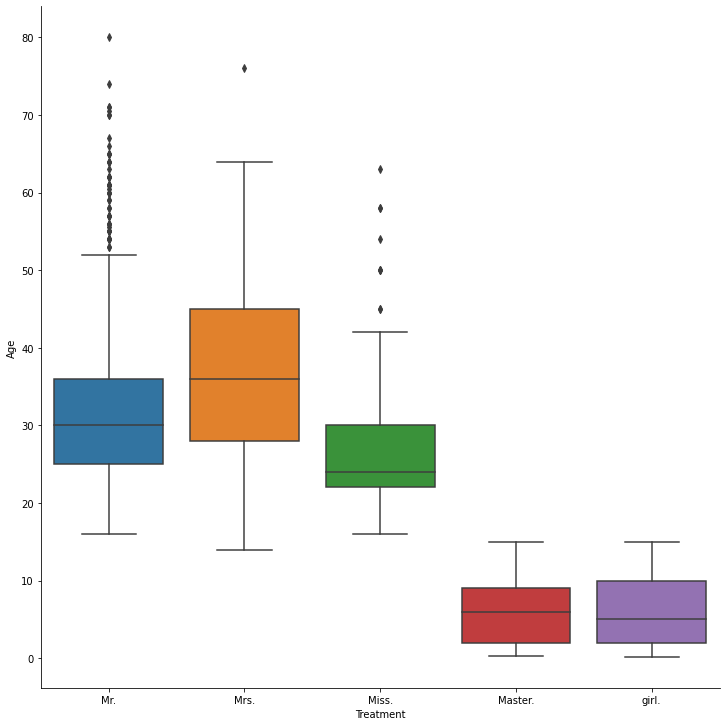

In [ ]:
data.loc[(data['Treatment'] == "Col.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Col.", "Age"].median()
data.loc[(data['Treatment'] == "Master.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Master.", "Age"].median()
data.loc[(data['Treatment'] == "Miss.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Miss.", "Age"].median()
data.loc[(data['Treatment'] == "Mr.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Mr.", "Age"].median()
data.loc[(data['Treatment'] == "Mrs.") & (data['Age'].isnull()), "Age"] = data.loc[data['Treatment'] == "Mrs.", "Age"].median()
sns.catplot(kind='box', y='Age', x='Treatment', data=data, height=10, aspect=1)

In [ ]:
data.loc[(data['Treatment'] == "Col.") , "Age"] = data.loc[data['Treatment'] == "Col.", "Age"].median()
data.loc[(data['Treatment'] == "Master.") , "Age"] = data.loc[data['Treatment'] == "Master.", "Age"].median()
data.loc[(data['Treatment'] == "Miss.") , "Age"] = data.loc[data['Treatment'] == "Miss.", "Age"].median()
data.loc[(data['Treatment'] == "Mr.") , "Age"] = data.loc[data['Treatment'] == "Mr.", "Age"].median()
data.loc[(data['Treatment'] == "Mrs.") , "Age"] = data.loc[data['Treatment'] == "Mrs.", "Age"].median()
data.loc[(data['Treatment'] == "girl.") , "Age"] = data.loc[data['Treatment'] == "girl.", "Age"].median()

In [ ]:
data.loc[data['Embarked'].isnull() , "Embarked"] = "S"


In [ ]:
fare=data.loc[(data['Fare'].isnull()) ] 
data.loc[data['Fare'].isnull() , "Fare"] = 13.3
# fare
data.loc[(data['Fare'].isnull()) ] 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Treatment


In [ ]:
data.loc[(data['Pclass'] == 3) , "Fare"] = data.loc[data['Pclass'] == 3, "Fare"].median()
data.loc[(data['Pclass'] == 2) , "Fare"] = data.loc[data['Pclass'] == 2, "Fare"].median()
data.loc[(data['Pclass'] == 1) , "Fare"] = data.loc[data['Pclass'] == 1, "Fare"].median()

In [ ]:
data['Family'] = data['SibSp'] +  data['Parch'] 
# data.drop(['SibSp', 'Parch'], axis='columns', inplace=True)

data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Treatment,Family
0,1,3,"Braund, Mr. Owen Harris",male,30.0,1,0,A/5 21171,8.05,NaN,S,Mr.,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,36.0,1,0,PC 17599,60.00,C85,C,Mrs.,1
2,3,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,8.05,NaN,S,Miss.,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,36.0,1,0,113803,60.00,C123,S,Mrs.,1
4,5,3,"Allen, Mr. William Henry",male,30.0,0,0,373450,8.05,NaN,S,Mr.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.05,NaN,S,Mr.,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,36.0,0,0,PC 17758,60.00,C105,C,Mrs.,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,30.0,0,0,SOTON/O.Q. 3101262,8.05,NaN,S,Mr.,0
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.05,NaN,S,Mr.,0


In [ ]:
data.isnull().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.774637
Embarked       0.000000
Treatment      0.000000
Family         0.000000
dtype: float64

#DESCRIÇÃO DOS DADOS

Nessa etapa vamos descrever os dados para conseguir entender e obter análises quantitativas do dataframe. Essa descrição é realizada diante da distribuição dos valores das variáveis e da correlação dos dados.


##Distribuição

A seguir são realizadas diversas plotagens con o método catplot para conseguir visualizar o contexto dos passageiros em diverentes aspects.

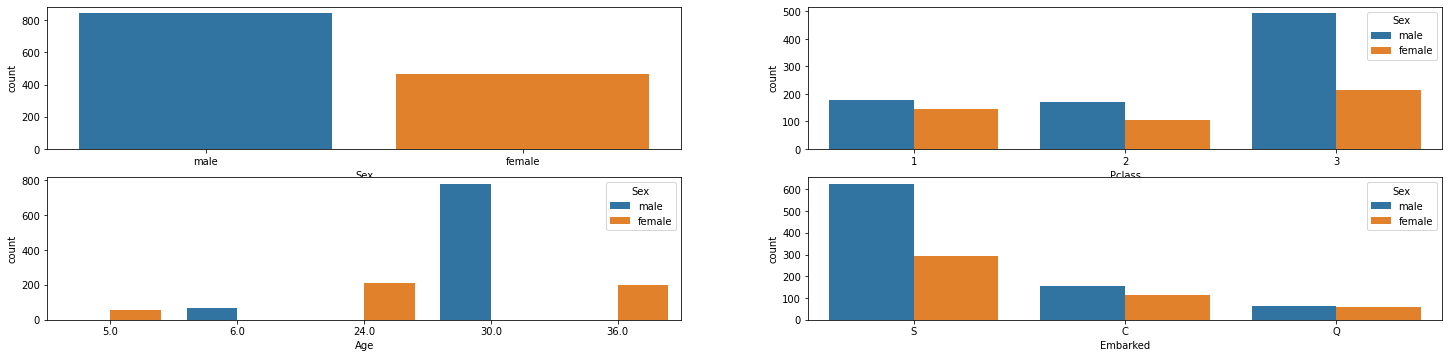

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(25, 3))
fig.subplots_adjust( bottom=0.05, top=1.5)

sns.countplot(x=data.Sex, ax=axes[0, 0])
sns.countplot(x=data.Pclass,hue=data.Sex,ax=axes[0, 1])

sns.countplot(x=data.Age,hue=data.Sex,ax=axes[1, 0])
sns.countplot(x=data.Embarked,hue=data.Sex,ax=axes[1, 1])


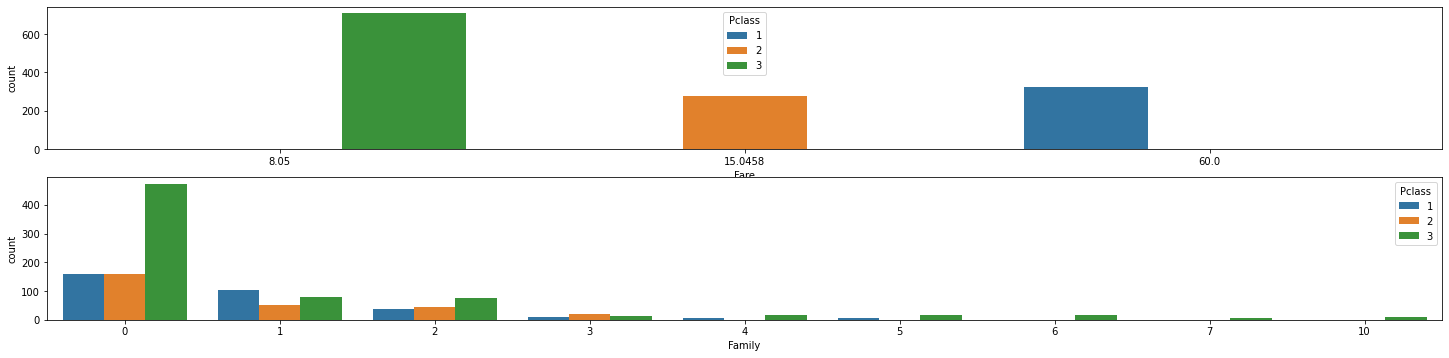

In [ ]:
fig, axes = plt.subplots(2, figsize=(25, 3))
fig.subplots_adjust( bottom=0.05, top=1.5)

sns.countplot(x=data.Fare,hue=data.Pclass, ax=axes[0])
sns.countplot(x=data.Family,hue=data.Pclass,ax=axes[1])

In [ ]:
# data.loc[(data['Treatment'] == "Miss.") & (data['SibSp'] == 0)] 


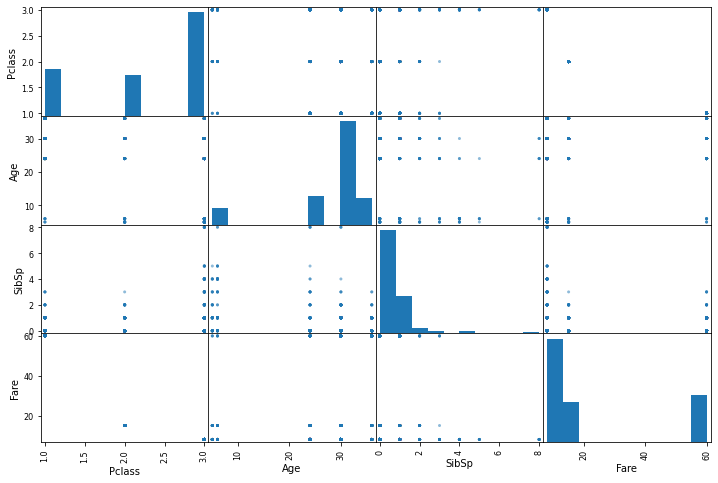

In [ ]:
scatter_matrix (data[['Pclass', 'Sex', 'Age','SibSp',  'Fare']], figsize = ( 12 , 8 ));

In [ ]:
!pip install pycaret -q

In [ ]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Treatment,Family
0,1,3,"Braund, Mr. Owen Harris",male,30.0,1,0,A/5 21171,8.05,NaN,S,Mr.,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,36.0,1,0,PC 17599,60.00,C85,C,Mrs.,1
2,3,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,8.05,NaN,S,Miss.,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,36.0,1,0,113803,60.00,C123,S,Mrs.,1
4,5,3,"Allen, Mr. William Henry",male,30.0,0,0,373450,8.05,NaN,S,Mr.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.05,NaN,S,Mr.,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,36.0,0,0,PC 17758,60.00,C105,C,Mrs.,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,30.0,0,0,SOTON/O.Q. 3101262,8.05,NaN,S,Mr.,0
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.05,NaN,S,Mr.,0


In [ ]:
passengerId = data['PassengerId'].iloc[train_lines:]

data.drop(['PassengerId'], axis='columns', inplace=True)
data.drop(['Name', 'Ticket', 'Cabin'], axis='columns', inplace=True)

train = data.iloc[:train_lines]
test = data.iloc[train_lines:]

test.shape

(418, 9)

In [ ]:
passengerId.shape

(418,)

In [ ]:
train['survived'] = survived
train.shape

(891, 10)

In [ ]:
train


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Treatment,Family,survived
0,3,male,30.0,1,0,8.0500,S,Mr.,1,0
1,1,female,36.0,1,0,60.0000,C,Mrs.,1,1
2,3,female,24.0,0,0,8.0500,S,Miss.,0,1
3,1,female,36.0,1,0,60.0000,S,Mrs.,1,1
4,3,male,30.0,0,0,8.0500,S,Mr.,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,male,30.0,0,0,15.0458,S,Mr.,0,0
887,1,female,24.0,0,0,60.0000,S,Miss.,0,1
888,3,female,24.0,1,2,8.0500,S,Miss.,3,0
889,1,male,30.0,0,0,60.0000,C,Mr.,0,1


In [ ]:
# clf = setup(data=train, target='survived')
# train.Parch.unique()

In [ ]:
clf = setup(data = train,
            target = 'survived',
            high_cardinality_features = ['Family', 'SibSp', 'Parch', 'Pclass','Age', 'Fare', 'Treatment'],
            log_experiment = True,
            experiment_name = 'craedit1');

,Description,Value
0,session_id,2046
1,Target,survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 10)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,True


In [ ]:
best = compare_models(sort='Prec.')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8297,0.8570,0.8071,0.8337,0.8274,0.6291,0.6363,0.099
lr,Logistic Regression,0.8265,0.8398,0.8010,0.8299,0.8236,0.6195,0.6274,0.339
gbc,Gradient Boosting Classifier,0.8185,0.8586,0.7849,0.8241,0.8130,0.5950,0.6088,0.082
ridge,Ridge Classifier,0.8217,0.0000,0.8006,0.8230,0.8200,0.6126,0.6167,0.017
lightgbm,Light Gradient Boosting Machine,0.8169,0.8504,0.7872,0.8211,0.8124,0.5948,0.6056,0.039
lda,Linear Discriminant Analysis,0.8186,0.8366,0.7964,0.8201,0.8165,0.6049,0.6097,0.016
catboost,CatBoost Classifier,0.8121,0.8563,0.7806,0.8175,0.8070,0.5832,0.5958,1.130
rf,Random Forest Classifier,0.8072,0.8546,0.7750,0.8129,0.8021,0.5727,0.5856,0.471
et,Extra Trees Classifier,0.8072,0.8457,0.7724,0.8123,0.8013,0.5697,0.5834,0.460
xgboost,Extreme Gradient Boosting,0.8057,0.8441,0.7746,0.8108,0.8006,0.5699,0.5820,0.259


In [ ]:
# print(best)

In [ ]:
dt = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9206,0.8948,0.9038,0.9229,0.9195,0.8276,0.8321
1,0.7778,0.8419,0.7804,0.7891,0.7803,0.5435,0.5482
2,0.8095,0.8312,0.7981,0.8095,0.8095,0.5962,0.5962
3,0.8710,0.8105,0.8261,0.8929,0.8634,0.7023,0.7356
4,0.8387,0.8579,0.8094,0.8390,0.8350,0.6416,0.6483
5,0.8226,0.8624,0.7939,0.8249,0.8177,0.6112,0.6209
6,0.7903,0.8224,0.7599,0.7902,0.7846,0.5405,0.5491
7,0.7742,0.7895,0.7467,0.7719,0.7696,0.5090,0.5141
8,0.8226,0.8251,0.8015,0.8216,0.8200,0.6173,0.6207
9,0.7742,0.8218,0.7621,0.7742,0.7742,0.5241,0.5241


In [ ]:
tuned_dt = tune_model(dt, optimize='Accuracy')
print(tuned_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9206,0.8948,0.9038,0.9229,0.9195,0.8276,0.8321
1,0.7778,0.8440,0.7804,0.7891,0.7803,0.5435,0.5482
2,0.8095,0.8333,0.7981,0.8095,0.8095,0.5962,0.5962
3,0.8710,0.8133,0.8261,0.8929,0.8634,0.7023,0.7356
4,0.8226,0.8601,0.7876,0.8238,0.8171,0.6021,0.6122
5,0.8226,0.8613,0.7939,0.8249,0.8177,0.6112,0.6209
6,0.7581,0.8191,0.7259,0.7556,0.7515,0.4698,0.4773
7,0.7742,0.7895,0.7467,0.7719,0.7696,0.5090,0.5141
8,0.8226,0.8229,0.8015,0.8216,0.8200,0.6173,0.6207
9,0.7742,0.8229,0.7621,0.7742,0.7742,0.5241,0.5241


LogisticRegression(C=3.625, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=1198, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


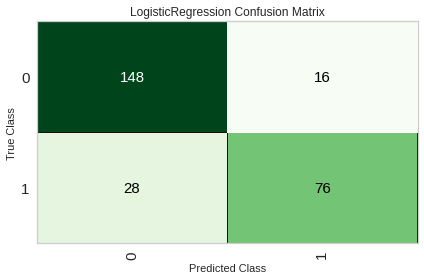

In [ ]:
plot_model(tuned_dt, plot='confusion_matrix') #Accuracy

In [ ]:
# plot_model(tuned_dt, plot='feature')

In [ ]:
# evaluate_model(tuned_dt)

In [ ]:
predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8358,0.8795,0.8166,0.8352,0.8337,0.6469,0.6499


,Pclass,Age,SibSp,Parch,Sex_male,Embarked_C,Embarked_Q,Embarked_S,survived,Label,Score
0,342.0,105.0,10.0,78.0,0.0,0.0,0.0,1.0,0,0,0.6468
1,122.0,374.0,424.0,475.0,1.0,0.0,0.0,1.0,0,0,0.6749
2,342.0,374.0,424.0,475.0,1.0,0.0,0.0,1.0,0,0,0.9190
3,342.0,86.0,424.0,57.0,0.0,1.0,0.0,0.0,1,1,0.7009
4,342.0,374.0,424.0,475.0,1.0,0.0,0.0,1.0,1,0,0.9190
...,...,...,...,...,...,...,...,...,...,...,...
263,342.0,374.0,150.0,78.0,1.0,0.0,0.0,1.0,0,0,0.9629
264,122.0,105.0,424.0,475.0,0.0,0.0,0.0,1.0,1,1,0.8987
265,342.0,374.0,424.0,475.0,1.0,1.0,0.0,0.0,0,0,0.8677
266,122.0,374.0,424.0,475.0,1.0,0.0,0.0,1.0,0,0,0.6749


In [ ]:
final_dt = finalize_model(tuned_dt)
print(final_dt)
save_model(final_dt, "lr")
saved_model_dt = load_model("lr")

LogisticRegression(C=3.625, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=1198, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Successfully Loaded


In [ ]:
test_preds = predict_model(final_dt, data=test)

In [ ]:
test_preds

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Treatment,Label,Score
0,3,male,30.0,0,0,8.0500,Q,Mr.,0,0.9019
1,3,female,36.0,1,0,8.0500,S,Mrs.,1,0.5404
2,2,male,30.0,0,0,15.0458,Q,Mr.,0,0.6134
3,3,male,30.0,0,0,8.0500,S,Mr.,0,0.9283
4,3,female,36.0,1,1,8.0500,S,Mrs.,0,0.5873
...,...,...,...,...,...,...,...,...,...,...
413,3,male,30.0,0,0,8.0500,S,Mr.,0,0.9283
414,1,female,36.0,0,0,60.0000,C,Mrs.,1,0.9484
415,3,male,30.0,0,0,8.0500,S,Mr.,0,0.9283
416,3,male,30.0,0,0,8.0500,S,Mr.,0,0.9283


In [ ]:
# test_preds.loc[(test_preds['Score'] >= 0.5) , "survived"] = 1
# test_preds.loc[(test_preds['Score'] < 0.5) , "survived"] = 0

# test_preds

In [ ]:
# y_pred_forest = test_preds['Label']
# y_pred_forest[y_pred_forest==1]

In [ ]:
# saved_model_dt = load_model('gr')

In [ ]:
# y_pred_forest = forest_clf.predict(test)

In [ ]:

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": test_preds['Label']
})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# Generating csv file
from google.colab import files

submission.to_csv('lr.csv', index=False)
files.download('lr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#MACHINE LEARNING

##Preparação dos dados

In [ ]:
data['Embarked_S'] = data['Embarked'].map({'S': 1, 'C': 0, 'Q': 0})
data['Embarked_C'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 0})
data['Embarked_Q'] = data['Embarked'].map({'S': 0, 'C': 0, 'Q': 1})
data['adultW'] = data['Treatment'].map({'girl.': 0, 'Master.': 0, 'Mrs.': 1, 'Miss.': 1, 'Mr.': 0})
data['adultM'] = data['Treatment'].map({'girl.': 0, 'Master.': 0, 'Mrs.': 0, 'Miss.': 0, 'Mr.': 1})
data['kid'] = data['Treatment'].map({'girl.': 1, 'Master.': 1, 'Mrs.': 0, 'Miss.': 0, 'Mr.': 0})
data.drop(['Embarked', 'Treatment', 'Lastname', 'Ticket', 'Cabin', 'Name'], axis='columns', inplace=True)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,adultW,adultM,kid
0,1,3,0,30.0,1,0,8.05,1,0,0,0,1,0
1,2,1,1,36.0,1,0,60.00,0,1,0,1,0,0
2,3,3,1,24.0,0,0,8.05,1,0,0,1,0,0
3,4,1,1,36.0,1,0,60.00,1,0,0,1,0,0
4,5,3,0,30.0,0,0,8.05,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.0,0,0,8.05,1,0,0,0,1,0
414,1306,1,1,36.0,0,0,60.00,0,1,0,1,0,0
415,1307,3,0,30.0,0,0,8.05,1,0,0,0,1,0
416,1308,3,0,30.0,0,0,8.05,1,0,0,0,1,0


In [ ]:
data.drop(['PassengerId'], axis='columns', inplace=True)

train = data.iloc[:train_lines]
test = data.iloc[train_lines:]
train.shape

(891, 11)

com base nos modelos de predição aplicados em https://github.com/rafaelnduarte/Titanic_Kaggle/blob/master/Titanic_Logistic_Regression_Decision_Tree.ipynb





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train, survived)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train, survived, cv=3, scoring='accuracy')

array([0.62962963, 0.76094276, 0.67003367])

In [ ]:
forest_clf.fit(train, survived)

y_pred_forest = forest_clf.predict(test)

In [ ]:
passengerId = test['PassengerId']

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_forest
})

# Generating csv file
from google.colab import files

submission.to_csv('submission_forest.csv', index=False)
files.download('submission_forest.csv')

In [ ]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, survived)

# Checking the accuracy of the model
acc_logReg = round(lr_model.score(train, survived) * 100, 2)
print("Logistic Regression Model Accuracy: {}".format(acc_logReg))

Logistic Regression Model Accuracy: 82.49


In [ ]:
passengerId = test['PassengerId']


In [ ]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# Generating csv file
from google.colab import files

submission.to_csv('submission_lr.csv', index=False)
files.download('submission_lr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Creating a Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, survived)

# Checking the accuracy of the model
acc_tree = round(tree_model.score(train, survived) * 100, 2)
print("Decision Tree Model Accuracy: {}".format(acc_tree))

Decision Tree Model Accuracy: 83.28


In [ ]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# generating csv file
submission.to_csv('submission_tree.csv', index=False)
files.download('submission_tree.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
gender = pd.read_csv('gender_submission.csv')
from sklearn.metrics import mean_absolute_error
erro = mean_absolute_error(y_pred_tree,gender.Survived)
erro 

0.2607655502392344